<a href="https://colab.research.google.com/github/GingerSpacetail/python_for_microscopists/blob/master/Tracking_particles_trajectories_TrackPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Track particles/objects trajectories**

---



## **Install trackpy in colab and get started**



Based on https://youtu.be/yh_nRTkh9xo and https://www.youtube.com/watch?v=wglCExzOKK0

I folked this repository to make modificatins https://github.com/GingerSpacetail/python_for_microscopists

Trackpy installation: http://soft-matter.github.io/trackpy/dev/installation.html

Trackpy strongly recommends using Conda and not pip. Therefore, we need to set up conda environment for our colab notebook covered here: https://youtu.be/v4qskw8EHXQ

For more examples of trackpy and to download sample data sets: https://github.com/soft-matter/trackpy-examples

This is needed for Colab only, not needed if installed locally.

Let us start by understanding the current python version in our colab and installing the corresponding conda environment.

In [86]:
!which python
!python --version

/usr/local/bin/python
Python 3.7.16


It gives python 3.10.12.
https://docs.conda.io/en/latest/miniconda.html#system-requirements

Let us reset the default python path for colab. Just to make sure we do not run into any issues later when miniconda installs its own version of python.

In [88]:
!echo $PYTHONPATH

In [89]:
%env PYTHONPATH=

env: PYTHONPATH=


In [90]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed


--2024-01-25 18:37:32--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.16.245.55, 104.16.246.55, 2606:4700::6810:f537, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.16.245.55|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh [following]
--2024-01-25 18:37:32--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh.2’

     0K .......... .......... .......... .......... ..........  0% 20.3M 5s
    50K .......... .......... ........

CalledProcessError: Command 'b'MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh\nMINICONDA_PREFIX=/usr/local\nwget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT\nchmod +x $MINICONDA_INSTALLER_SCRIPT\n./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX\n'' returned non-zero exit status 1.

Verify to see if the conda executable is available

In [91]:
!which conda # should return /usr/local/bin/conda

/usr/local/bin/conda


Confirm the conda version

In [92]:
!conda --version # should return 4.12.0

conda 4.14.0


Update conda

In [93]:
%%bash
conda install --channel defaults conda python=3.7 --yes
conda update --channel defaults --all --yes

Process is terminated.


In [94]:
!conda --version

conda 4.14.0


In [95]:
!python --version

Python 3.7.16


Provide directory where site packages are installed within miniconda

First, check the current paths.

In [96]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages']

Now add the path for our site-packages

In [97]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.7/site-packages"))

Now, we are all set to install trackpy library using conda.

Please note that you will be prompted to answer Yes/No a couple of times.

In [98]:
!conda install -c conda-forge trackpy


Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [99]:
!conda install -c conda-forge pims

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done


http://soft-matter.github.io/trackpy/v0.5.0/tutorial/walkthrough.html

##Import the required libraries

In [100]:
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [101]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

##Import your data

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Make sure to upload your data to Google Drive and mount the drive to make it accessible via your colab notebook.

Load the time series image folder with multiple images or single movie file or tiff stack.

We will be using this data set:
https://github.com/soft-matter/trackpy-examples/tree/master/sample_data/bulk_water

In [103]:
#To read single tiff stack
# To read standard files, including tiff stacks, we can use pims.open
#frames_single_tiff=pims.open('/content/drive/MyDrive/ColabNotebooks/data/tracking_data/bulk_water/bulk_water.tif')
#frames_single_tiff

In [104]:
#To read multiple images from a directory
#Also, let us convert the images to grey by just using the green channel image
#We can also use built in method: pims.as_grey
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.open('/content/drive/MyDrive/_Molecular Bionics Group/Scripts and experiments/Trajectories tracking/trackpy-examples-master/sample_data/bulk_water/*.png'))

In [105]:
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: /content/drive/MyDrive/_Molecular Bionics Group/Scripts and experiments/Trajectories tracking/trackpy-examples-master/sample_data/bulk_water/*.png
    Length: 300 frames
    Frame Shape: (424, 640, 4)
    Pixel Datatype: uint8

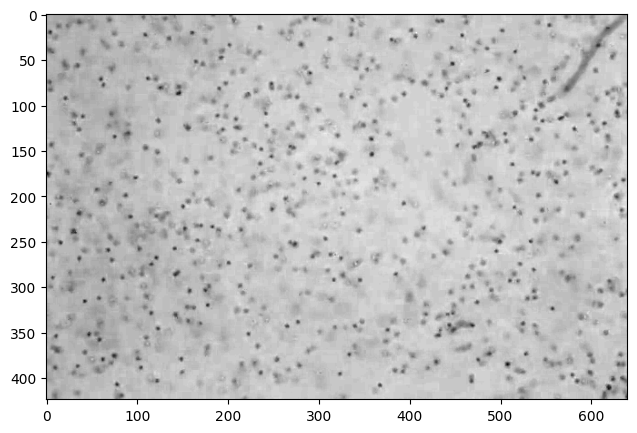

In [106]:
plt.imshow(frames[5])

##**Locate (segment) features**

This step performs segmentation using Gaussian blob detection. We can use Deep Learning based segmentation.

For blob detection, estimate the size of features. Here, we are making an estimate of 11.




###Random guess to estimate average particle size

Visualizing the segmentation with an estimate of 11 pixels.

The algorithm looks for bright features; since the features in this set of images are dark, we set invert=True.

In [107]:
f = tp.locate(frames[0], 11, invert=True) #invert means our particlas are dark, background is light

locate returns a spreadsheet-like object called a DataFrame. It lists each feature's position,
various characterizations of its appearance, which we will use to filter out spurious features,
the "signal" strength and an estimate of uncertainty, both derived from this paper: https://www.cell.com/biophysj/fulltext/S0006-3495(05)73136-2

In [108]:
f.head()  # shows the first few rows of data
#mass is intensity

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,4.750000,103.668564,192.862485,2.106615,0.066390,10.808405,10714.0,0.073666,0
1,5.249231,585.779487,164.659302,2.962674,0.078936,4.222033,10702.0,0.075116,0
2,5.785986,294.792544,244.624615,2.244542,0.219217,15.874846,10686.0,0.077141,0
3,5.869369,338.173423,187.458282,2.046201,0.185333,13.088304,10554.0,0.099201,0
4,6.746377,310.584169,151.486558,3.103294,0.053342,4.475355,10403.0,0.147430,0


You can use tp.annotate to display the objects that we will be tracking.

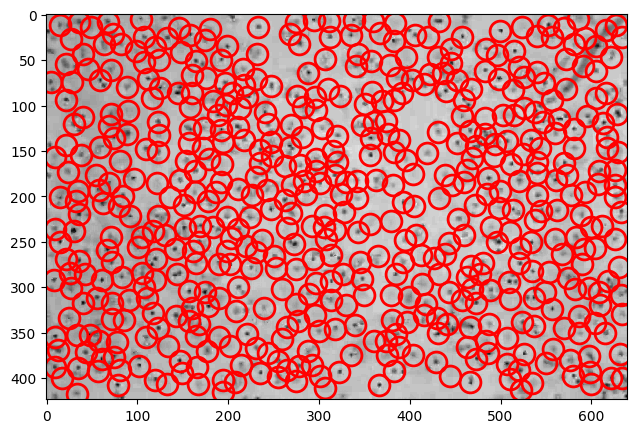

<Axes: >

In [109]:
tp.annotate(f, frames[0])

###Filtering objects based on particle size histogram

Plot object areas to investigate the distribution. You can further filter out objects based on size or intensity.

In trackpy, the brightness is referred to as 'mass'. Let us plot mass to identify any outliers.

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

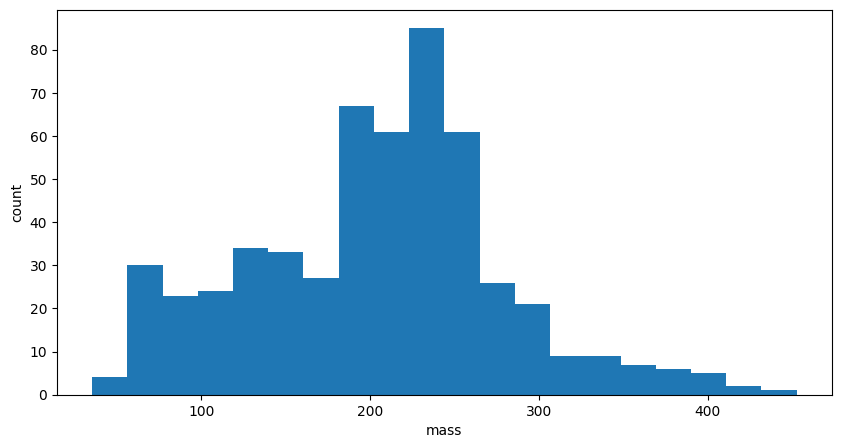

In [110]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

We can filter based on threshold or also by defining minimum or maximum mass (brightness). Let us filter all blobs below a mass of 20.

In [111]:
f = tp.locate(frames[0], 11, invert=True, minmass=20)

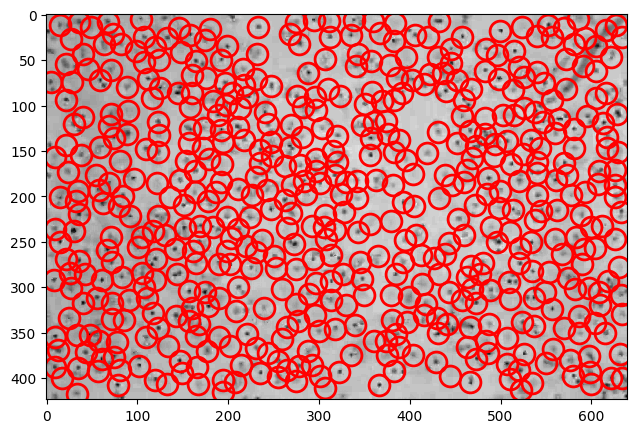

In [112]:
tp.annotate(f, frames[0]);

###**Locating (segmenting) features in all 300 frames**

We'll locate features in the first 300 frames from this video. We use tp.batch, which calls tp.locate on each frame and collects the results.

In [113]:
f = tp.batch(frames[:300], 11, minmass=20, invert=True)

Frame 299: 624 features


##**Link features into particle trajectories**

We have the locations of the particles in each frame. Next we'll track particles from frame to frame, giving each one a number for identification.

First, we must must specify a maximum displacement, the farthest a particle can travel between frames. We should choose the smallest reasonable value because a large value slows computation time considerably. In this case, 5 pixels is reasonable.

Second, we allow for the possibility that a particle might be missed for a few frames and then seen again. (Perhaps its "mass" slipped below our cutoff due to noise in the video.) Memory keeps track of disappeared particles and maintains their ID for up to some number of frames after their last appearance. Here we use 3 frames.

In [114]:
t = tp.link(f, 5, memory=3)

Frame 299: 624 trajectories present.


In [115]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,4.750000,103.668564,192.862485,2.106615,0.066390,10.808405,10714.0,0.073666,0,0
365,284.118980,25.313881,149.037779,2.321961,0.031799,7.008575,10770.0,0.067577,0,1
364,282.753601,534.788476,222.754482,1.908443,0.103416,15.874846,10415.0,0.141946,0,2
363,280.010398,275.185353,186.782757,2.508665,0.183181,7.261897,10438.0,0.132499,0,3
362,279.134153,252.780324,151.064355,2.938060,0.253812,4.306474,10359.0,0.171764,0,4


###**Filter spurious trajectories**

We have more filtering to do. Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [117]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 13715
After: 1505


We can also filter trajectories by their particles' appearance. At this stage, with trajectories linked, we can look at a feature's "average appearance" throughout its trajectory, giving a more accurate picture.



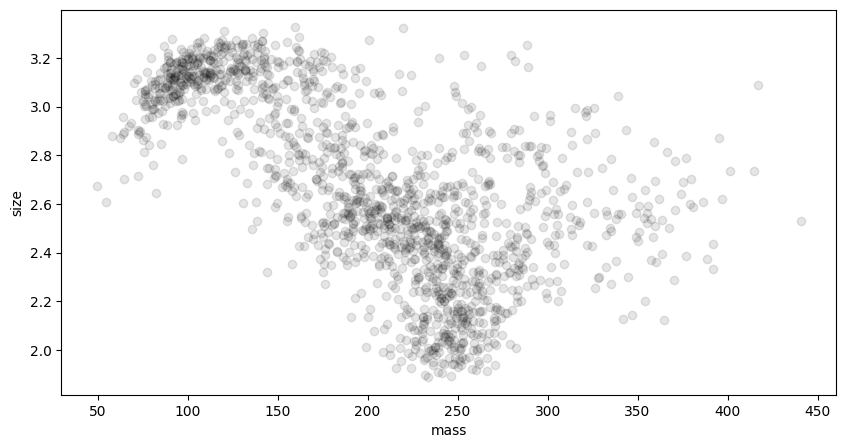

In [118]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

The particles with especially low mass, or that are especially large or non-circular (eccentric), are probably out of focus or aggregated, respectively. It is best to experiment by trial and error, filtering out regions of mass-size space and looking at the results using tp.annotate. In the end, we need to separate the good particles from the spurious ones, and it doesn't matter how we get it done.

In [119]:
t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.3))]

###Visialize the filtered segmetation

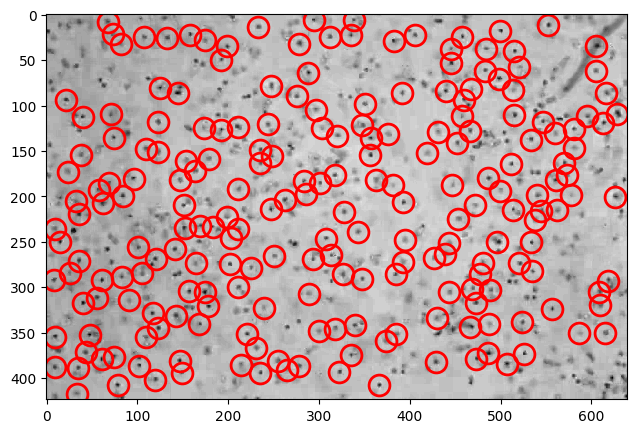

In [120]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0]);

Trace the trajectories using plot_traj():

###Check for subpixel accuracy


A quick way to check for subpixel accuracy is to check that the decimal part of the x and/or y positions are evenly distributed. Trackpy provides a convenience plotting function for this called subpx_bias:

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

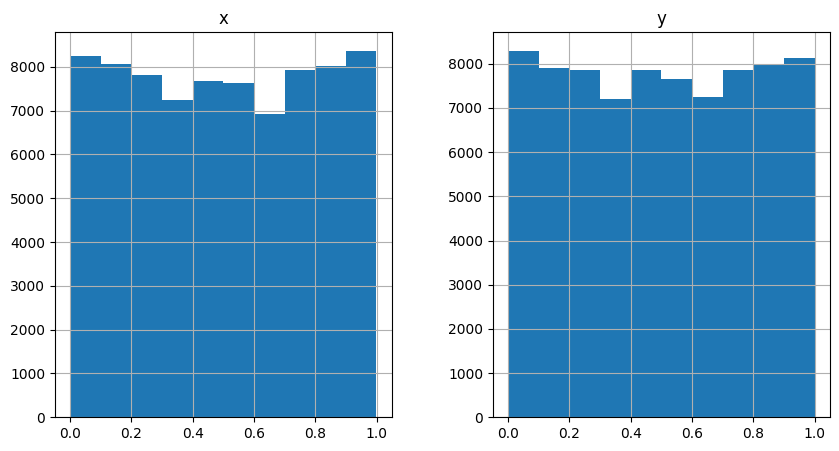

In [121]:
tp.subpx_bias(t2)

####Conpare with a non evenly distributed decimal part

If we use a mask size that is too small, the histogram often shows a dip in the middle.

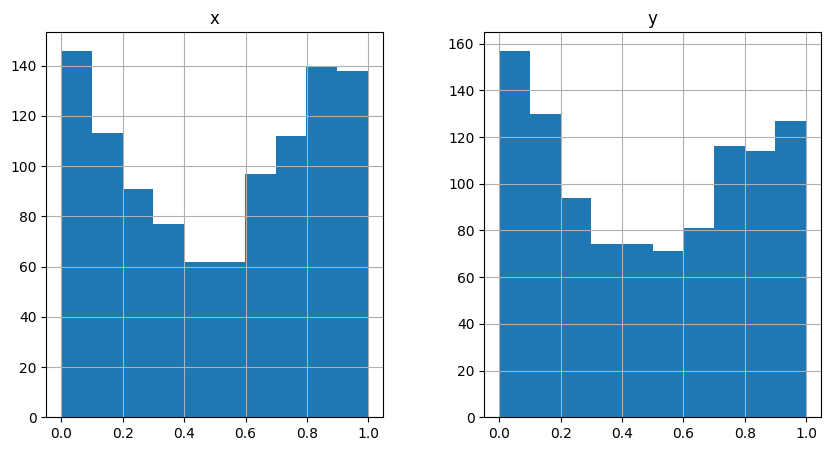

In [58]:
tp.subpx_bias(tp.locate(frames[0], 7, invert=True, minmass=20));

##Plot trajectories

Plot the calculated trajectories as is

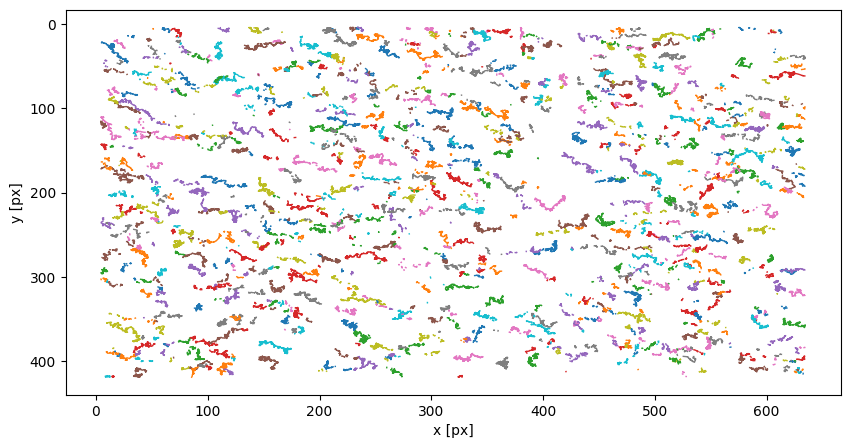

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [122]:
plt.figure()
tp.plot_traj(t2)

###Compensate for drift

Compute the overall drifting motion, which we will subtract away, adopting the reference frame of the particles' average position.

In [123]:
d = tp.compute_drift(t2)

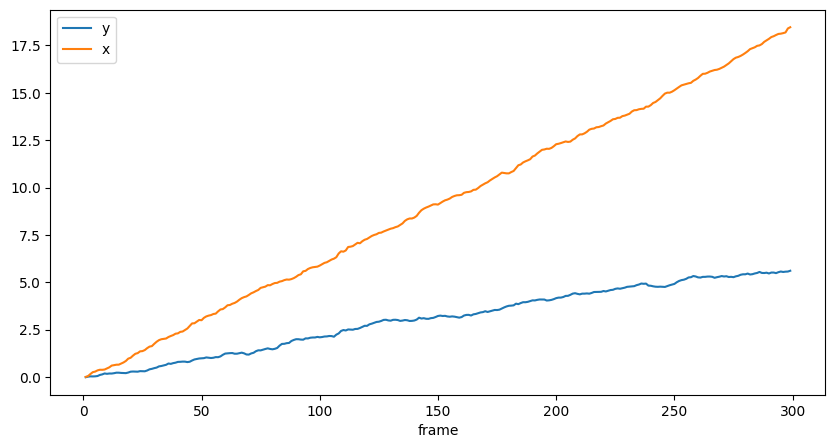

In [124]:
d.plot()
plt.show()

Subtract the drift

In [125]:
tm = tp.subtract_drift(t2.copy(), d)

###Plot the trajectories again

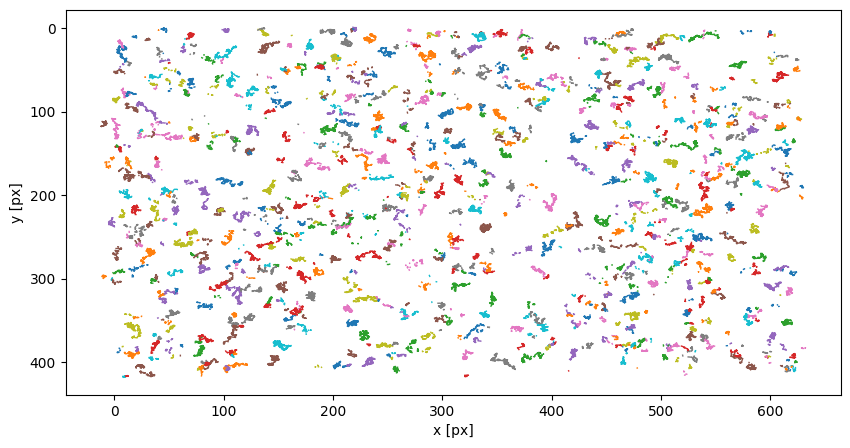

In [126]:
ax = tp.plot_traj(tm)
plt.show()

## **Analyze trajectories**

**Mean Squared Displacement of Individal Probes**

Compute the mean squared displacement (MSD) of each particle using the imsd function, and plot MSD vs. lag time.

In [127]:
im = tp.imsd(tm, 100/285., 24)  # microns per pixel = 100/285., frames per second = 24


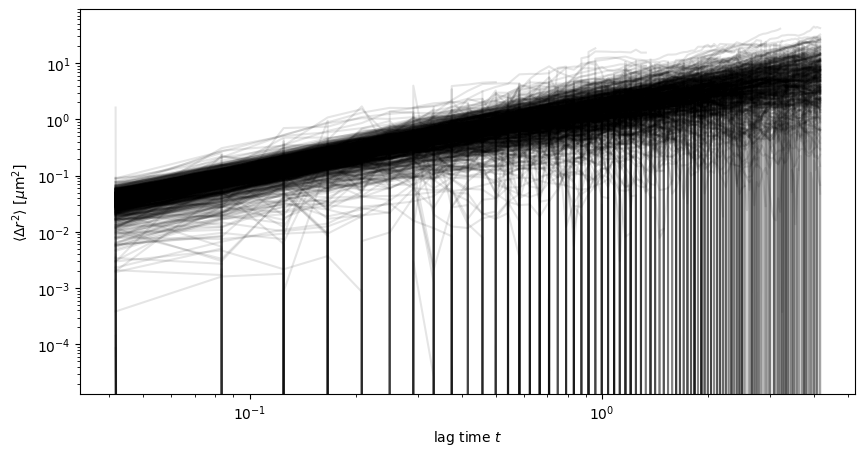

In [128]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

###**Ensemble Mean Squared Displacement**

Now use the emsd function to compute the ensemble mean squared displacement (EMSD) of all particles:

In [129]:
em = tp.emsd(tm, 100/285., 24) # microns per pixel = 100/285., frames per second = 24

/usr/local/lib/python3.7/site-packages/trackpy/motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
/usr/local/lib/python3.7/site-packages/trackpy/motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


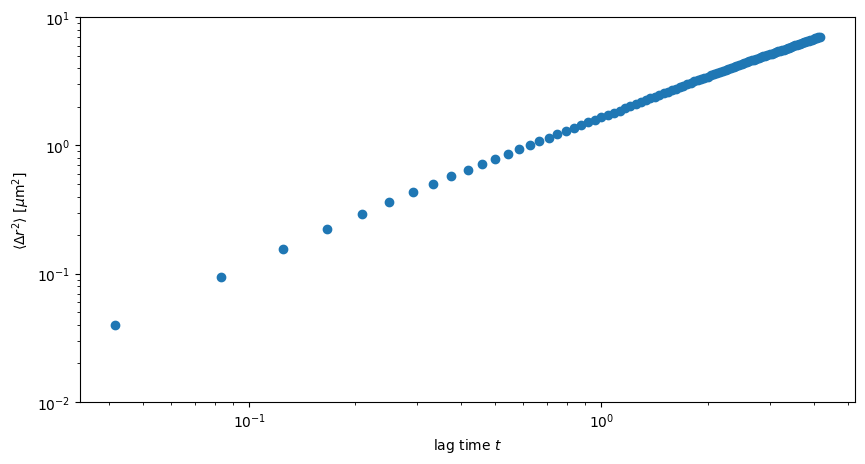

In [130]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10));

We can easily fit this ensemble mean-squared displacement to a power law, , using a convenience function, fit_powerlaw, which performs a linear regression in log space.

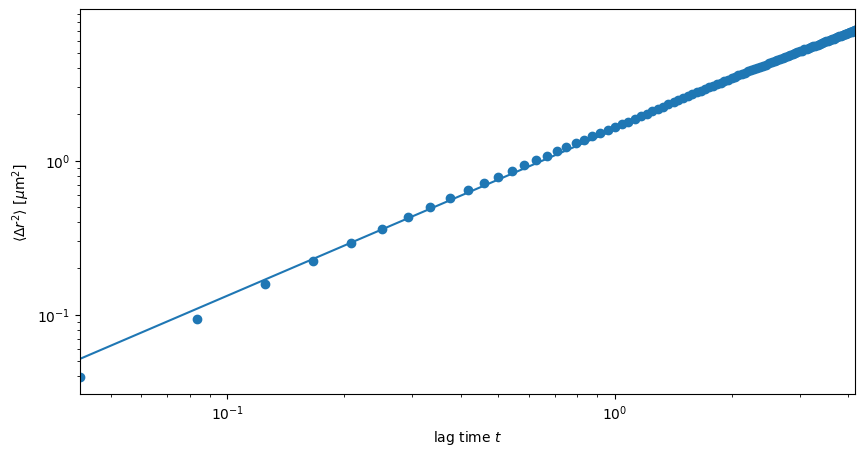

,n,A
msd,1.0787,1.595089


In [131]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]

##Velocity field

###Velocity: general considerations

Definition of the velocity,
$$𝑣=^{def} lim_{Δ𝑡→0}\frac{𝑥(𝑡+Δ𝑡)−𝑥(𝑡)}{Δ𝑡}≡\frac{d𝑥}{d𝑡} \tag{0}$$

Assuming a particle is moving according to a Langevin equation,

$$ 𝑚 \frac{d𝐯} {d𝑡}=\frac{𝐯}{𝜇}+𝜼(𝑡) $$
where $𝜼(𝑡)$ represents the stochastic white noise. The general solution for this is,

$$ 𝐯(𝑡)=𝐯(0)e^{−𝑡/𝜏}+\frac{1}{𝑚}∫_0^𝑡 𝜼(𝑡′)e^{−(𝑡−𝑡′)/𝜏}d𝑡′  \tag{1} $$
where $𝜏=𝑚𝜇$ is the relaxation time. The mean square of Eq (1) is found to be,
$$⟨𝑣^2(𝑡)⟩=⟨𝑣^2(0)⟩e^{−2𝑡/𝜏}+\frac{𝑘𝑇}{𝑚}(1−e^{−2𝑡/𝜏}) \tag{2}$$
where the $𝑘𝑇$ comes from the equipartition theorem and the autocorrelation of the noise term, $⟨𝜂(𝑡)𝜂(𝑡′)⟩=2𝑘𝑇𝛿(𝑡−𝑡′)$.

We can integrate Eq (1) again to find the displacement from the original position,
$$𝐝(𝑡)=𝐯(0)𝜏(1−e^{−𝑡/𝜏})+𝜇∫_0^𝑡 𝜼(𝑡′)(1−e^{−(𝑡−𝑡′)/𝜏})d𝑡′$$
From which the average distance is equal to the first term on the right. If we want the mean square displacement, then we need to square this and after some work, we find,
$$⟨𝑑^2(𝑡)⟩=𝑣^2(0)𝜏^2(1−𝑒^{−𝑡/𝜏})^2−\frac{3𝑘𝑇}{𝑚}𝜏^2𝑓(𝑡,𝜏)+\frac{6𝑘𝑇}{𝑚}𝜏𝑡 \tag{3}$$
where $𝑓(𝑡,𝜏)$ is some function of $e^{−𝑡/𝜏}$ that isn't exactly important right now. The $𝑘𝑇$

terms also arise due to the same reasons in Eq (2).

Direct comparison of Eq (2) and Eq (3) clearly show that it is not generally true that $⟨𝑑^2⟩=⟨𝑣^2⟩𝑡^2$.

However, we can look at two limiting cases to see if it could be the case.


**Short time scales**

For $𝑡≪𝜏$, Eq (2) reduces to,
$$⟨𝑣^2(𝑡≪𝜏)⟩≈⟨𝑣^2(0)⟩$$
while Eq (3) reduces to,
$$⟨𝑑^2(𝑡≪𝜏)⟩≃⟨𝑣^2(0)⟩𝑡^2 \tag{4}$$
This is close to simple equation (if we integrated from $𝑡_1$ to $𝑡_2$ and defined $Δ𝑡=𝑡_2−𝑡_1$, then it'd be an exact relation), but as Eq (4) is valid only for short timescales, then the wanted relation doesn't hold for particularly long.

**Long time scales**

The long time solution to the Langevin equation should replicate the Boltzmann distribution. Hence, in this limit Eq (2) reduces to,
$$lim_{𝑡→∞}⟨𝑣^2(𝑡)⟩=\frac{𝑘𝑇}{𝑚} $$
as it should. Eq (3) in this limit, the last term dominates,
$$lim_{𝑡→∞}⟨𝑑^2(𝑡)⟩=\frac{6𝑘𝑇}{𝑚}𝑡𝜏=6⟨𝑣^2(𝑡)⟩𝑡𝜏 $$
which also is also quite feasible relationship, due to the relation being linear with time 𝑡 (with 𝜏 providing the other unit of time to make the units match).

In [ ]:
#ensemble mean-squared velocity from ensemble mean-squared displacement (for short time frames!)
#	n	A
#msd	1.0787	1.595089

def msd(time):
  dist= 1.595089 * np.exp(-1.0787*t)
  return dist

def msv(dist, time):.
  velocity = np.sqrt(dist) / time

Step 1: calculation

In [132]:
col_names = ['dx', 'dy', 'x', 'y', 'frame', 'particle']
# Creating an empty dataframe to store results
data = pd.DataFrame(np.zeros(shape=(1, 6), dtype=np.int64), columns=col_names)

for i in set(t2.particle):
        sub = t2[t2.particle==i]

        if sub.shape[0]<=2:
            # Cases in which particle only has 1 or 2 rows of data
            pass
        else:
            #print('Deriving velocities for particle:', str(i))
            dvx = pd.DataFrame(np.gradient(sub.x), columns=['dx',])
            dvy = pd.DataFrame(np.gradient(sub.y), columns=['dy',])

            new_df = pd.concat((dvx, dvy, sub.x.reset_index(drop=True), sub.y.reset_index(drop=True),
                                sub.frame.reset_index(drop=True), sub.particle.reset_index(drop=True)),
                                axis=1, names=col_names, sort=False)
            data = pd.concat((data, new_df), axis=0)

# This is to get rid of the first 'np.zeros' row and to reset indexes
data = data.reset_index(drop=True)
data = data.drop(0)
data = data.reset_index(drop=True)

Step 2: rendering

In [133]:
from matplotlib.pyplot import quiver

(-0.5, 639.5, 423.5, -0.5)

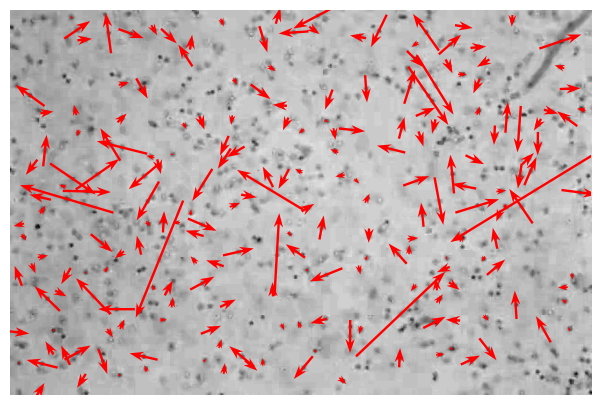

In [134]:
i = 0
d = data[data.frame==i]
plt.imshow(frames[i])
plt.quiver(d.x, d.y, d.dx, -d.dy, pivot='middle', headwidth=4, headlength=6, color='red')
plt.axis('off')

In [ ]:
data

##Image processing (optional)

In [46]:
from scipy import ndimage
from skimage import morphology, util, filters

In [ ]:
#rawframes = pims.open('/content/drive/MyDrive/_Molecular Bionics Group/Scripts and experiments/Trajectories tracking/trackpy-examples-master/sample_data/bulk_water/*.png')

In [76]:
@pims.pipeline
def preprocess_image(img):
    """
    Apply image processing functions to return a binary image
    """
    # Crop the pictures as for raw images if needed
    #img = crop(img)
    # Apply thresholds
    adaptive_thresh = filters.threshold_local(img,255)
    idx = img < adaptive_thresh
    idx2 = img > adaptive_thresh
    img[idx] = 0
    img[idx2] = 255
    img = ndimage.binary_dilation(img)
    img = ndimage.binary_dilation(img)
    return util.img_as_int(img)



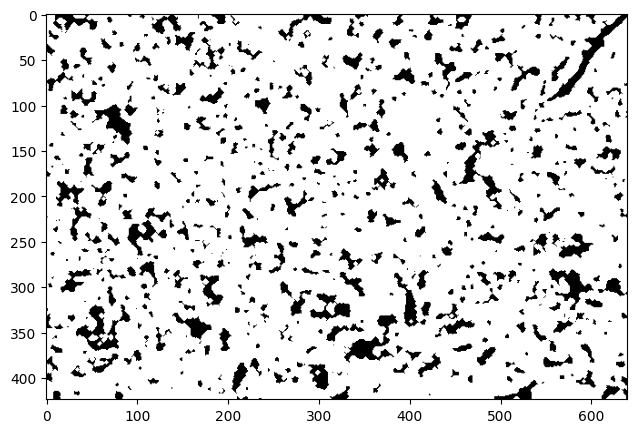

In [77]:

binary_frames = preprocess_image(frames)
plt.imshow(binary_frames[5]);

###Custom feature detection


Our features are the bubbles represented by the small black areas surrounded by white edges. Note that the black area at the bottom is the liquid should not be considered as a feature. We use again scikit-image with the labeling function to detect the bubbles. The function returns several values such as the positon, the mean intensity, the area, the excentricity, etc. that can be used to remove false-postive labels. In our example, we must choose smart criterions because the bubble size is clearly different on the top and on the bottom.

We make a test on one picture first to seek and validate our criterions. We use matplotlib to draw rectangles around each feature.

In [78]:
import skimage
import matplotlib.patches as mpatches



In [82]:
img_example = binary_frames[1]

Found 643 features


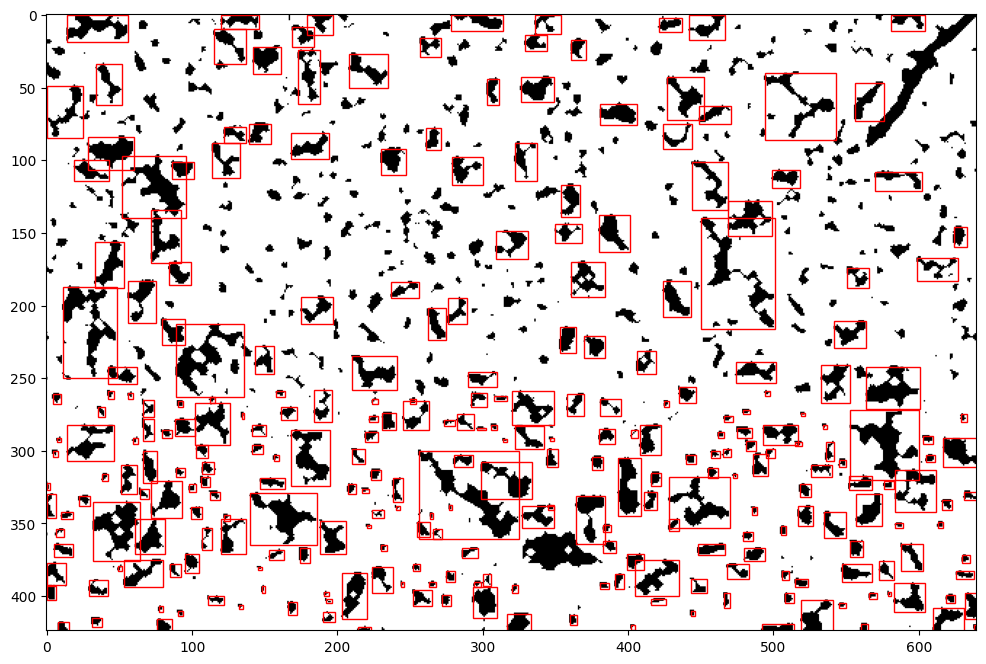

In [83]:
# Label elements on the picture
white = 255
label_image, number_of_labels = skimage.measure.label(img_example, background=white, return_num=True)
print("Found %d features"%(number_of_labels))
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
ax.imshow(img_example)
for region in skimage.measure.regionprops(label_image, intensity_image=img_example):
    # Everywhere, skip small and large areas
    if region.area < 2 or region.area > 50:
        continue
    # Only black areas
    if region.mean_intensity > 1:
        continue
    # On the top, skip large areas with a second threshold
    if region.centroid[0] > 260 and region.area > 80:
        continue
    # Draw rectangle which survived to the criterions
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)

    ax.add_patch(rect)

In [84]:
img_example = frames[1]

Found 38759 features


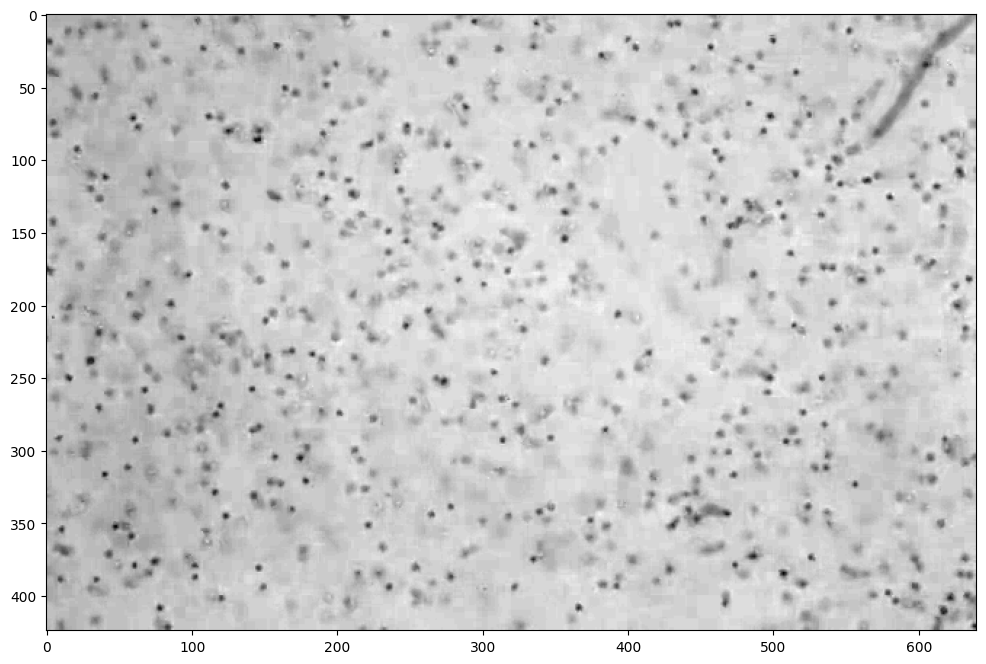

In [85]:
# Label elements on the picture
white = 240
label_image, number_of_labels = skimage.measure.label(img_example, background=white, return_num=True)
print("Found %d features"%(number_of_labels))
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
ax.imshow(img_example)
for region in skimage.measure.regionprops(label_image, intensity_image=img_example):
    # Everywhere, skip small and large areas
    if region.area < 5 or region.area > 800:
        continue
    # Only black areas
    if region.mean_intensity > 1:
        continue
    # On the top, skip small area with a second threshold
    if region.centroid[0] < 260 and region.area < 80:
        continue
    # Draw rectangle which survived to the criterions
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)

    ax.add_patch(rect)

In [ ]:
#features = pd.DataFrame()
#for num, img in enumerate(frames):
#    white = 255
#    label_image = skimage.measure.label(img, background=white)
#    for region in skimage.measure.regionprops(label_image, intensity_image=img):
#        # Everywhere, skip small and large areas
#        if region.area < 5 or region.area > 800:
#            continue
#        # Only black areas
#        if region.mean_intensity > 1:
#            continue
#        # On the top, skip small area with a second threshold
#        if region.centroid[0] < 260 and region.area < 80:
#            continue
#        # Store features which survived to the criterions
#        features = features.append([{'y': region.centroid[0],
#                                     'x': region.centroid[1],
#                                     'frame': num,
#                                     },])

In [ ]:
#tp.annotate(features[features.frame==(id_example+1)], img_example);

###Partickle tracking

We may superimpose the trajectories with the first picture to check their consistency.

In [ ]:
search_range = 11
t = tp.link_df(features, search_range, memory=5)
tp.plot_traj(t, superimpose=img)

##Deep learning segmentation (optional)

In [135]:
# for interactive plotting
%matplotlib inline

import numpy as np
import pandas as pd

import pims
import trackpy as tp
import os

import matplotlib  as mpl
import matplotlib.pyplot as plt

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')



In [ ]:
!conda install conda-forge::stardist

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [46]:
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'stardist.lib.stardist2d'

In [64]:
# prints a list of available models
StarDist2D.from_pretrained()



NameError: name 'StarDist2D' is not defined